# Exploração e Análise de Dados de vendas de filias de Mercados utilizando SQL

sql.avif

## Introdução

Os dados utilizados para esse projeto pode ser encontrado no seguinte link https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales. Esse banco de dados nos traz dados a respeito de três filias de supermercados e suas respectivas cidades, e histórico de crescimento de vendas durante três meses. Com esses dados podemos fazer várias análises com SQL em relação ao desempenho das filiais, de modo a trazer melhorias para o negócio e entender os pontos fortes e fracos desse mercado, dentre vários insights. Para conhecer melhor os dados, podemos visualizar os atributos logo a seguir.

**ATRIBUTOS:**

Os dados apresentam informações a respeito dos clientes dos supermercados e contam com os seguintes atributos:

*   **Invoice id**: Número de identificação da fatura do comprovante de vendas gerado por computador;
*   **Branch**: Filial do supercentro (3 filiais estão disponíveis identificadas por A, B e C);
*   **City**: Localização dos supercentros;
*   **Customer type**: Tipo de cliente, cadastrado por Integrante para clientes com cartão de associado e Normal para sem cartão de associado;
*   **Gender**: Gênero tipo de cliente;
*   **Product line**: Grupos de categorização geral de itens - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas, Saúde e beleza, Casa e estilo de vida, Esportes e viagens;
*   **Unit price**: Preço
de cada produto em $;
*   **Quantity**: Número de produtos adquiridos por cliente;
*   **Tax**: taxa de imposto de 5% para compra do cliente;
*   **Total**: Preço total incluindo impostos;
*   **Date**: Data da compra (registro disponível de janeiro de 2019 a março de 2019);
*   **Time**: Horário da compra (10h às 21h);
*   **Payment**: Pagamento utilizado pelo cliente para compra (3 métodos disponíveis - Dinheiro, Cartão de crédito e Ewallet);
*   **COGS**: Custo das mercadorias vendido;
*   **Gross margin percentage**: Porcentagem da margem bruta;
*   **Gross income**: Receita bruta;
*   **Rating**: Classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10).








A tabela com esses dados foi criado no **AWS Athena** com o **S3 Bucket**.



---



## Exploração de dados

A primeira fase do nosso projeto é entender quais são os dados que vamos utilizar, para isso temos que explorá-los.

**Qual a quantidade de informações temos na nossa base de dados?**

**QUERY 1**: SELECT COUNT(*) FROM supermarkets

*RESPOSTA:*

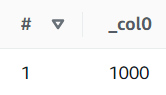

>Acima, podemos ver uma pequena visualização gerada na plataforma **Athena** ao executar o código SQL anterior, referente a "QUERY 1" acima.

**Como são os dados?**

**QUERY 2**: SELECT * FROM supermarkets LIMIT 10;

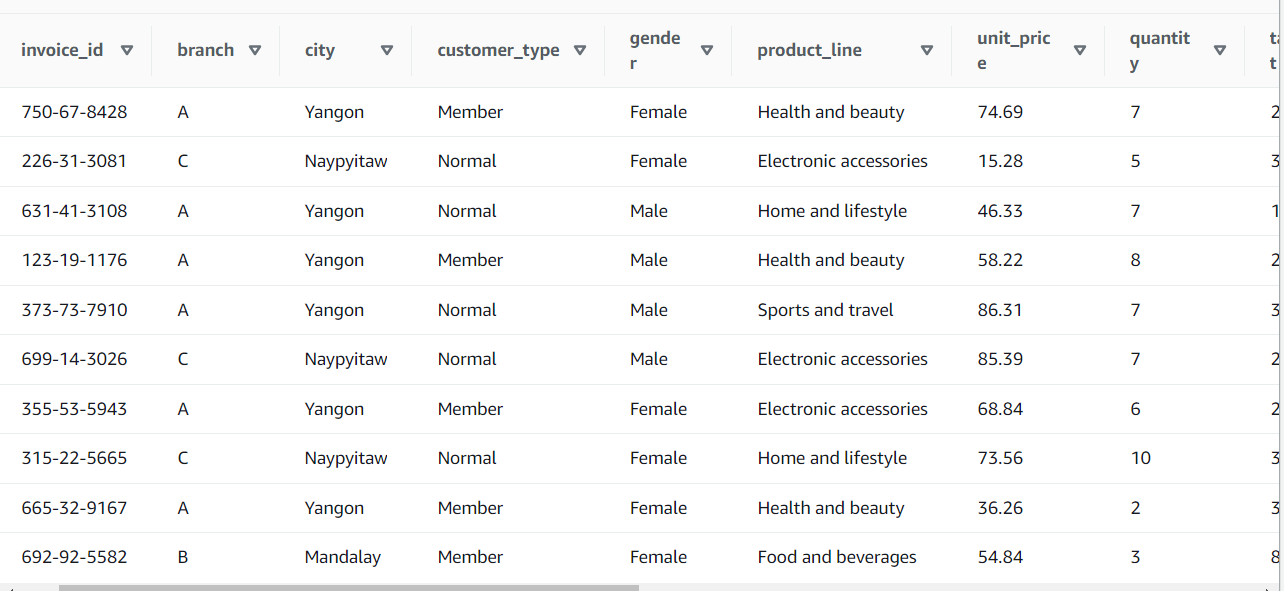

>Acima vemos uma breve visualização das dez primeiras linhas dos dados e suas primeiras colunas. Por ser um banco de dados com uma quantidade significativa de linhas e colunas, pode ficar complicado conter todas em apenas uma imagem. Com esse intuito, você pode abrir as querys em seu próprio ambiente de execução, se desejar. Eu irei disponibilizar as querys com o intuito de deixar esse material aberto ao público em geral.

**Quais os tipos dos dados?**

**QUERY**: Describe supermarkets

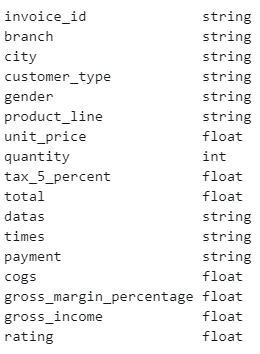

>Acima podemos visualizar quais os tipos dos dados referente as colunas;

**Quais são os tipos de filiais disponíveis no dataset?**

**QUERY 3**: SELECT DISTINCT branch FROM supermarkets

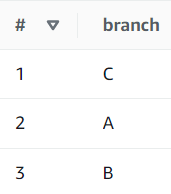

>Os dados possuem três tipos de filias (A, B e C)

**Quais são as cidades disponíveis no dataset?**

**QUERY 4**: SELECT DISTINCT city FROM supermarkets

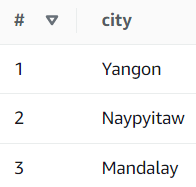

>Os dados possuem três cidades como vemos acima.

**Quais os tipos de cliente disponíveis no dataset?**

**QUERY 5**: SELECT DISTINCT customer_type FROM supermarkets

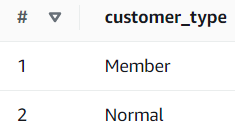

>Acima, vemos que os dados são divididos em dois tipos de clientes.

**Quais as linhas de produtos disponíveis no dataset?**

**Query 6**: SELECT DINSTINCT product_line FROM supermarkets

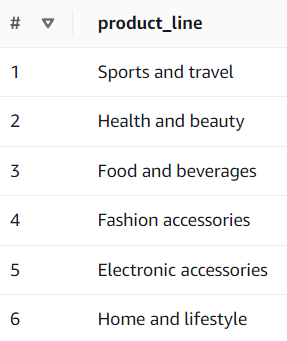

>Agora, vemos quais são os tipos de produtos disponíveis na base de dados.

**Quais as formas de pagamento disponíveis no dataset?**

**Query 7**: SELECT DISTINCT payment FROM supermarkets

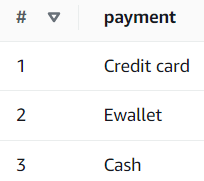

>E por fim, vemos que os clientes utilizam três formas de pagamento.

## Análise de dados

Agora que exploramos nosso banco de dados e entendemos melhor as informações que vamos trabalhar, está na hora de analisar os dados para responder a algumas dúvidas.



1.   **Nesse banco de dados, qual o valor de total por homens e o seu respectivo tipo de perfil?**



**Query8**: SELECT invoice_id , customer_type, total  FROM supermarkets WHERE gender = 'Male' ORDER BY total DESC;

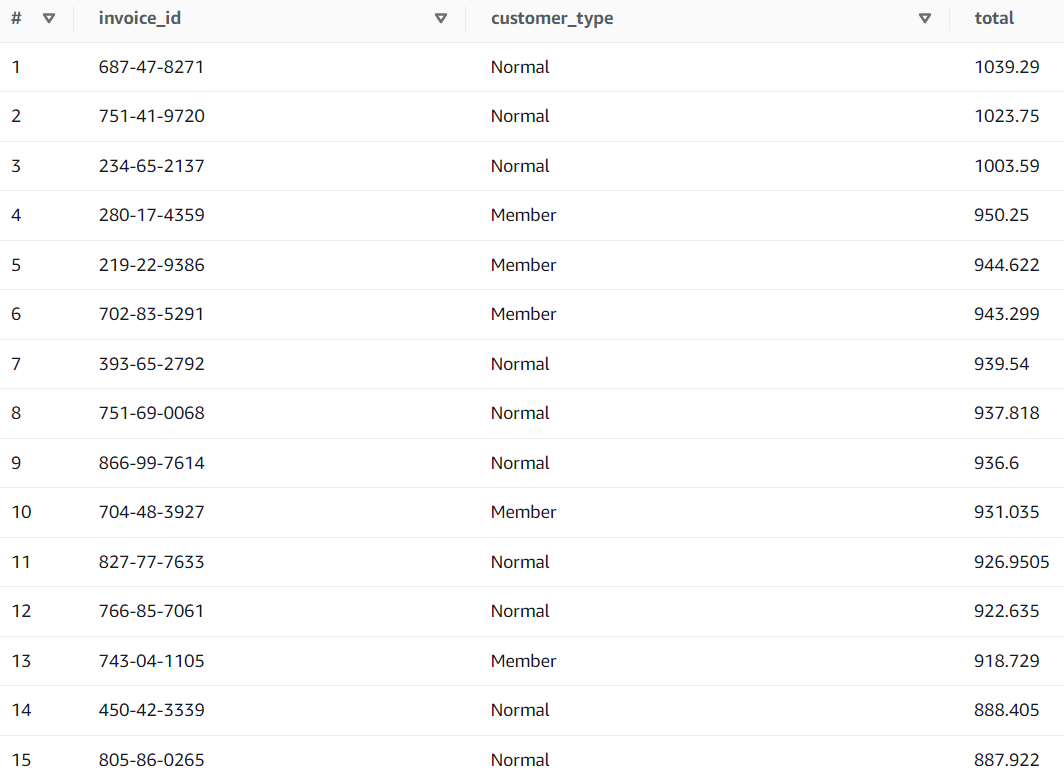

> Vemos acima que filtramos uma lista de clientes apenas homens de acordo com a categoria tipo do cliente. Observando que as três primeiras linhas temos clientes com alto valor de total (acima de 1000) que não utilizam cartão associado (Normal), no entanto ao observar os demais dados vemos que há uma mistura de clientes com cartão associado (Member) e sem cartão com total alto e baixo. Dessa forma, pode ser interessante para empresa focar em clientes de alta renda para adquirir um cartão associado já que são pessoas que costumam gastar mais e possuem condições de adquirir esse cartão, gerando benefícios para a própria empresa e fidelizando o cliente.


2.   **Nesse banco de dados, qual o valor de total por mulheres e o seu respectivo tipo de perfil?**



**Query9**:SELECT invoice_id, customer_type, total FROM supermarkets WHERE gender = 'Female' ORDER BY total DESC;

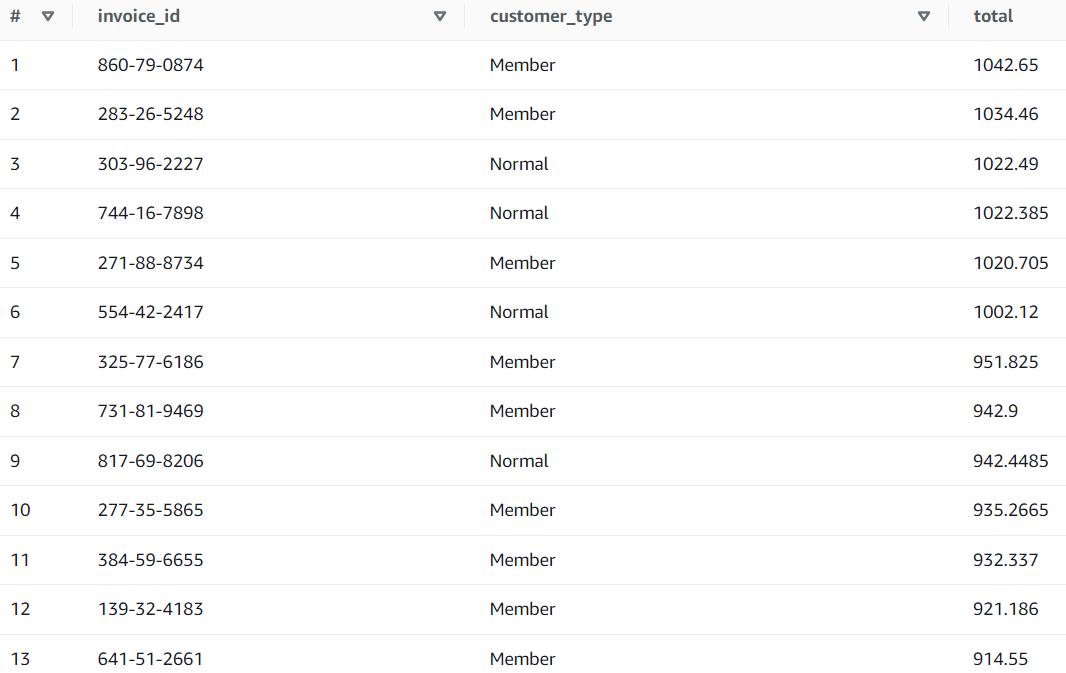

>Acima, observamos que os maiores valores de total são de clientes femininas que utilizam o cartão associado, apesar de existir um misto de tipo de cliente Normal e Member, vemos que há bastante clientes femininas com cartão associado. Poderíamos utilizar a mesma estratégia que utilizamos com o público masculino para atrair mais clientes a utilizar o cartão.



3.  **Nesse banco de dados, qual a média do valor total por sexo?**



**Query10**: SELECT gender , AVG(total) AS "media_total_por_sexo" FROM supermarkets GROUP BY gender;

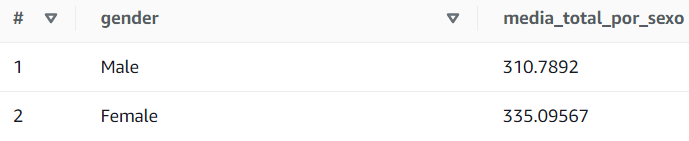

>Vemos na visualização acima que a maioria dos clientes são mulheres.



4.   **Nesse banco de dados, filtre apenas os valores onde total é maior que 800.00 na cidade de Yagon**


**Query11**:SELECT total, city  FROM supermarkets WHERE total > 800.00 AND city = 'Yangon' ORDER BY total DESC;

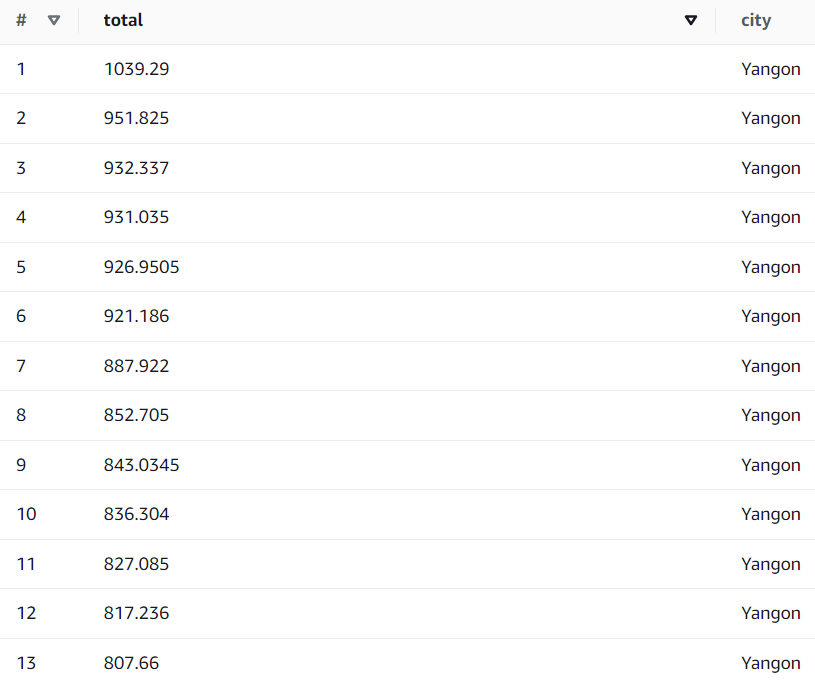

>Usamos a função para filtrar os valores de total acima de 800.00. De acordo com o objetivo da empresa, pode ser interessante utilizar esse tipo de filtro, quando se está interessado em filtrar certos valores.



5.   **Nesse banco de dados, filtre apenas os valores onde total é maior que 800.000 na cidade Naypyitaw**



**Query12**: SELECT total, city FROM supermarkets WHERE total > 800.00 And city = 'Naypyitaw' ORDER BY total DESC;

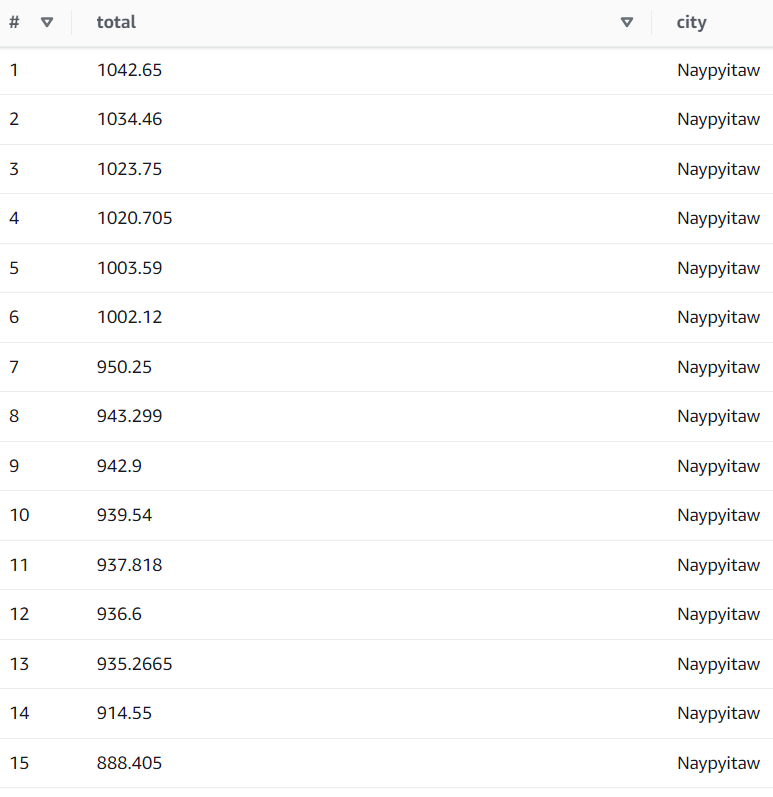

> Acima, utilizamos o mesmo filtro do exemplo anterior, só que referente à cidade de Naypyitaw. Vemos que essa cidade teve mais clientes com o total acima de 1000.00, em contraste com o exemplo anterior, em que a cidade Yangon teve menos clientes com esse valor. Portanto, poderíamos observar mais aspectos em relação a Naypyitaw para entender esse resultado.



6.   **Nesse banco de dados, filtre apenas os valores onde total é maior que 800.00 na cidade Mandalay**



**QUERY13:** SELECT total, city FROM supermarkets WHERE total > 800 And city = 'Mandalay' ORDER BY total DESC;

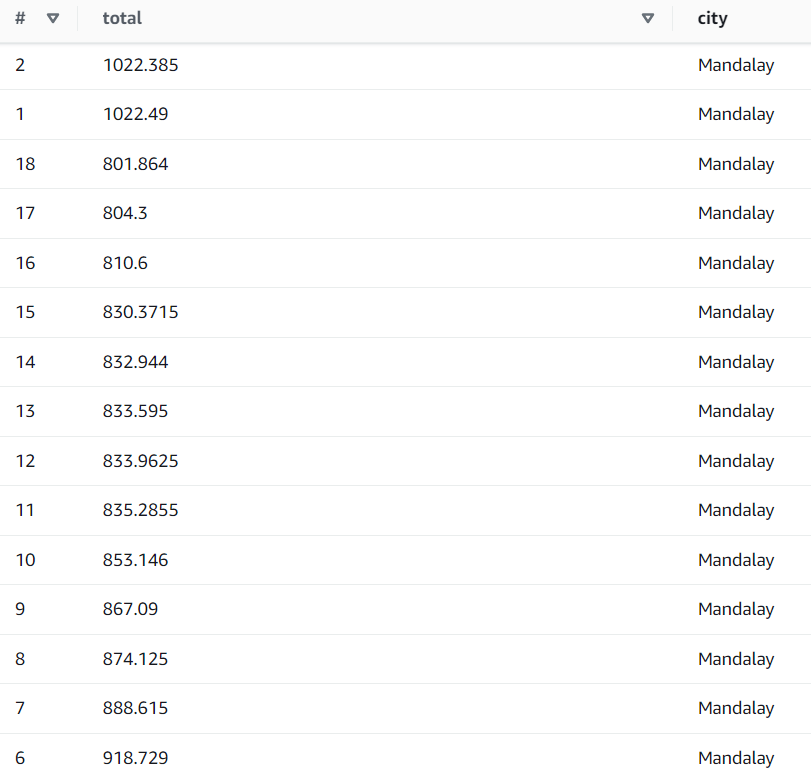

>Utilizamos o mesmo filtro dos exemplos anteriores. Podemos observar os valores referentes à cidade de Mandalay.


7.   **Nesse banco de dados, filtre apenas o preço unitário que forem maiores que 70 de acordo com a linha do produtos de beleza e acessórios fashion por cliente.**


**Query14**:SELECT invoice_id, product_line, unit_price FROM supermarkets WHERE product_line IN ('Health and beauty','Fashion acessorie') And unit_price > 70;

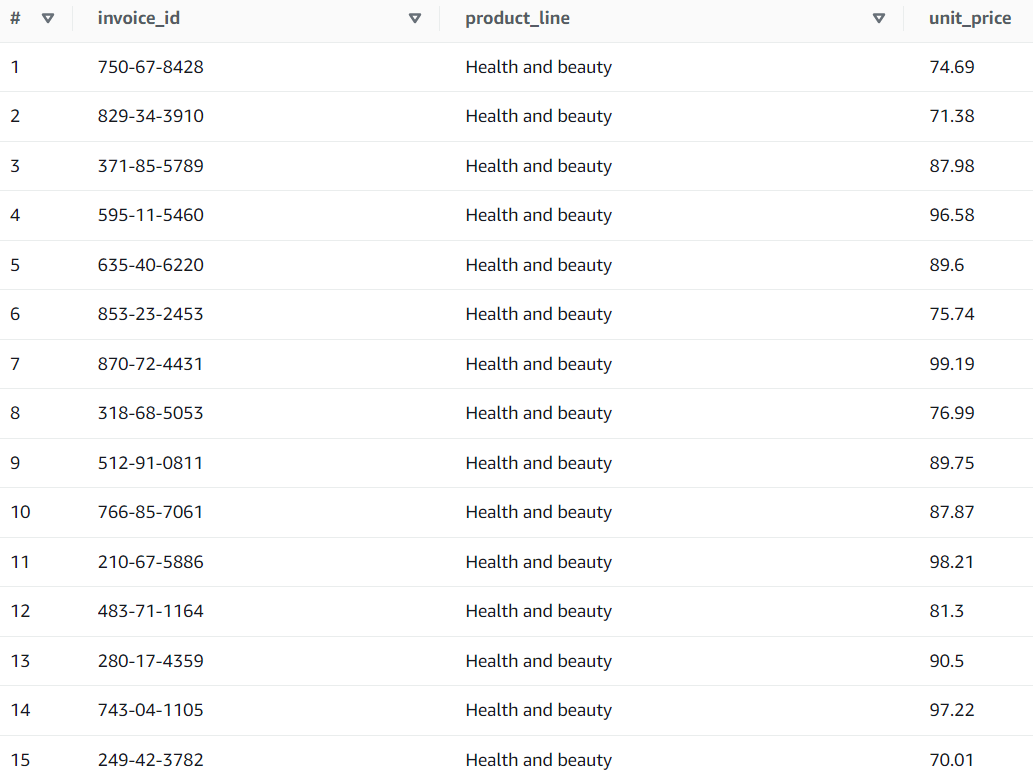

>Na visualização acima, nos filtramos os tipos a linha dos produtos para mostrar apenas os produtos de Saúde e beleza e acessórios de moda e o seu respectivo preço unitário e identificação do cliente. Portanto, com esses dados, a empresa poderia fazer um ajuste de preços dos produtos com base nesse eixo da linha específico, dependendo dos objetivos da empresa.



8.   **nesse banco de dados, qual a média do total por tipo de pagamento?**



**Query15**:SELECT payment , AVG(total) AS "media_total_por_tipo_pagamento" FROM supermarkets GROUP BY payment ORDER by media_total_por_tipo_pagamento ASC;

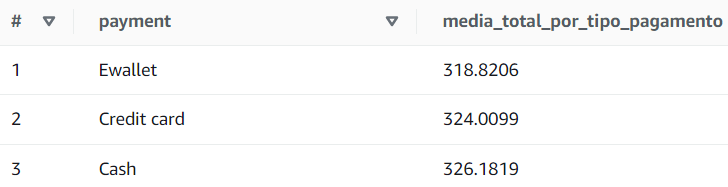

>Nos dados acima, tiramos a média dos valores de total em relação ao tipo de pagamento mais utilizados pelos clientes. Descobrimos que dinheiro é a forma de pagamento mais utilizada, seguido de cartão de crédito e Ewallet.



9.   **Nesse banco de dados, Selecione apenas os valores de total entre 100.000 e 200.00 por tipo de pagamento**


**QUERY16**:SELECT payment, total FROM supermarkets  WHERE total  BETWEEN 100.000 AND 200.000;

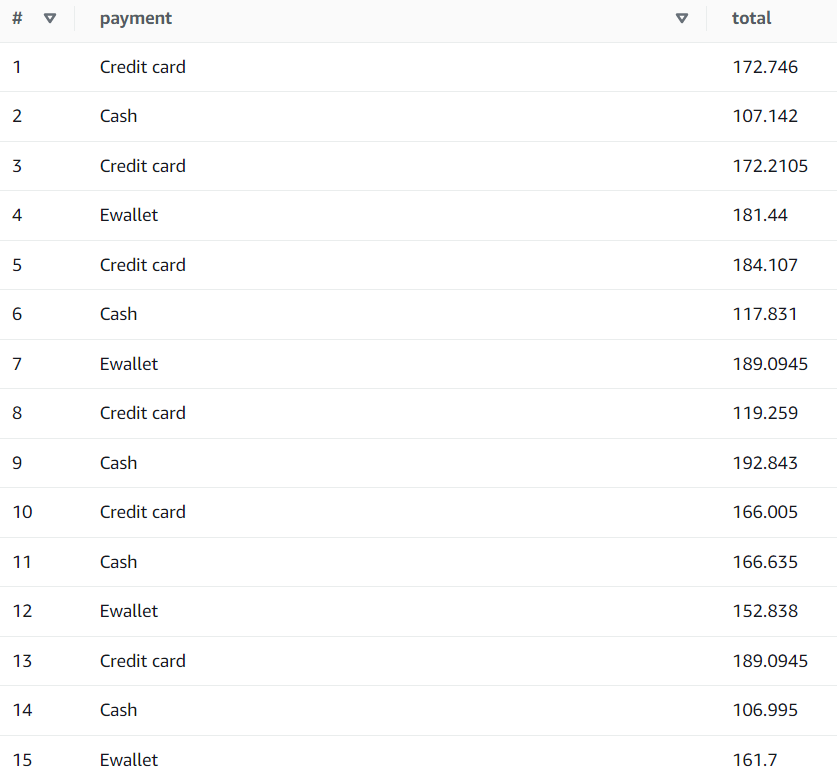

>Acima, filtramos os valores de total entre 100 e 200 em relação às formas de pagamento. Essa estratégia é interessante para analisar os dados de acordo com um período específico, pois pode ajudar a identificar tendências ou padrões nos dados que seriam difíceis de detectar se os dados fossem analisados como um todo.



10.  **Nesse banco de dados, selecione apenas o total minimo , médio e máximo agrupado pelo supermecado**  



**QUERY17**:SELECT MAX(total) AS "Maior_total", AVG(total) AS "Media_total", MIN(total) AS "minimo_total", branch FROM supermarkets GROUP BY branch;

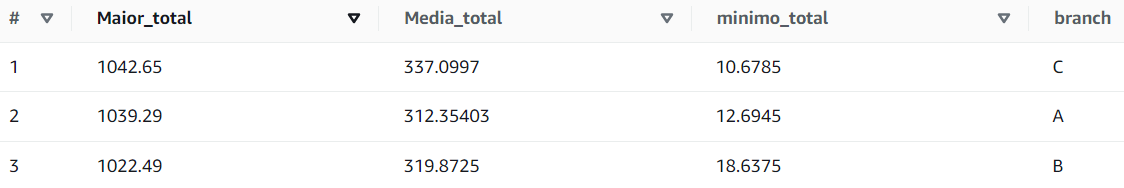

>Na visualização acima, calculamos os valores mínimos, máximos e médios agrupados pelas filiais. Vemos que a filial "C" possui a maior média_total e maior maior_total. Isso pode ser explicado pelo fato de que a filial "C" pode ter um público-alvo diferente das outras filiais, ou que ela pode estar localizada em uma região com um poder aquisitivo maior.



11.   **Nesse banco de dados, classifique o total como maior valor e menor valor**



**QUERY18**:SELECT invoice_id , branch, total,
CASE
    WHEN total > 500.000 THEN 'Total com alto valor'
    WHEN total < 500.000 THEN 'Total com baixo valor'
END
AS classetotal
FROM supermarkets
WHERE total > 10.000;

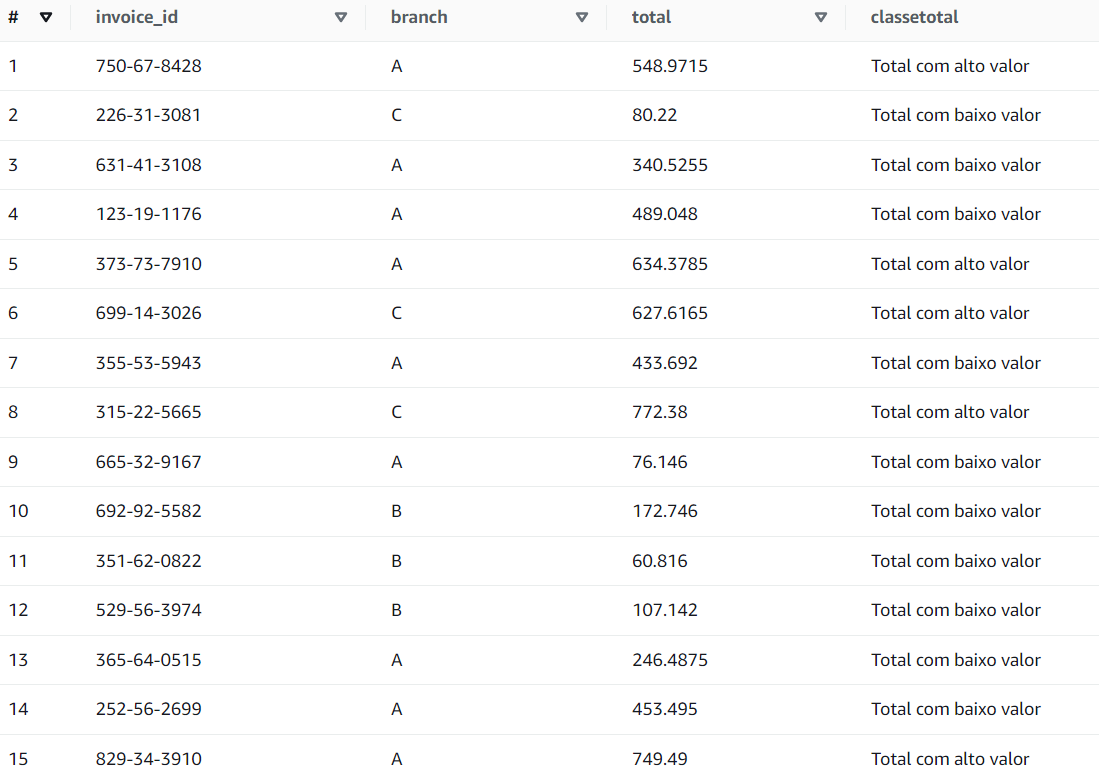

>Na base de dados acima, nós criamos uma nova coluna(classetotal) em relação aos valores da coluna total em que os valores de total acima de 500 seriam considerados "Total com alto valor", caso contrário, seriam classificados como "Total com baixo valor". Portanto, isso traria uma visão mais ampla dos dados que estamos trabalhando.



12.   **Nesse banco de dados, Qual a soma das unidades adquiridas de acordo com a linha de produto?**



**QUERY19**:SELECT SUM(quantity), product_line FROM supermarkets  GROUP BY product_line HAVING SUM(quantity) > 1;

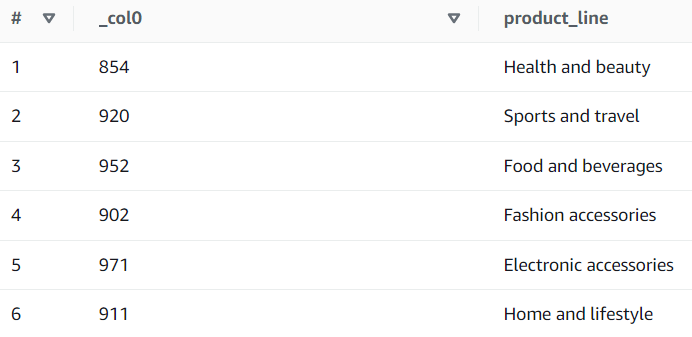

>Acima, nós somamos a quantidade de produtos adquiridos agrupando pela linha do produto. Vemos que acessórios eletrônicos são os que possuem maior quantidade de itens adquiridos pelos clientes, fechando o top 3 com Alimentos e bebidas; e esportes e viagens. Essas informações podem ser usadas para melhorar a estratégia de marketing da empresa. Por exemplo, a empresa pode direcionar campanhas de marketing específicas para essas linhas de produtos.



13.   **Nesse banco de dados, quais os tipos de produtos que recebem as maiores taxa de 5% de imposto?**



**QUERY20**:SELECT AVG(tax_5_percent) AS "media_taxa_5_porcento", MIN(tax_5_percent) AS "minimo_taxa_5_porcento", MAX(tax_5_percent) AS "maxima_taxa_5_percent", product_line FROM supermarkets GROUP BY product_line ORDER BY media_taxa_5_porcento DESC;

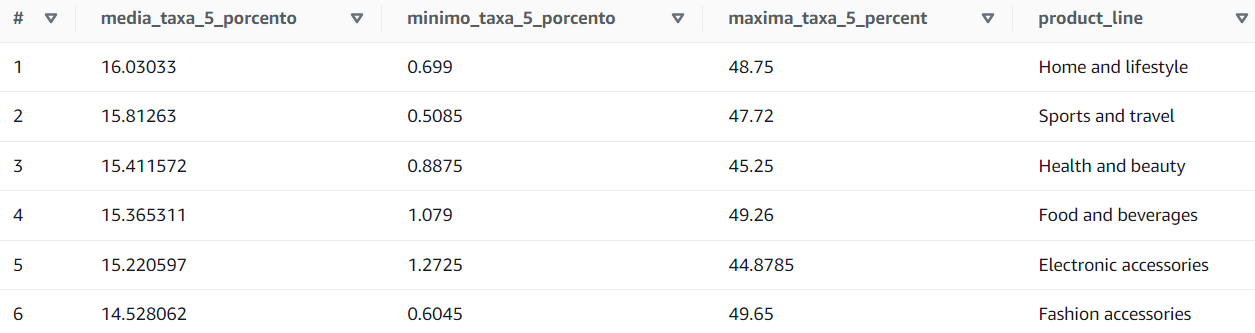

>Acima, tiramos os valores mínimos, máximos e médios da taxa de 5% agrupados por linha de produto. Analisando os dados, percebemos que clientes que adquirem produtos de casa e estilo de vida pagam uma média_taxa_5_porcento maior que os outros, no entanto, não é uma diferença de porcentagem muito grande, chegando a valores semelhantes no restante das linhas de produto.



14.   **Nesse banco de dados, quais as cidades que tiverem a melhor média de avaliação do cliente.**



**QUERY21**:SELECT AVG(rating) AS "media_avaliacao_cidade", city FROM supermarkets GROUP BY city ORDER BY media_avaliacao_cidade DESC;

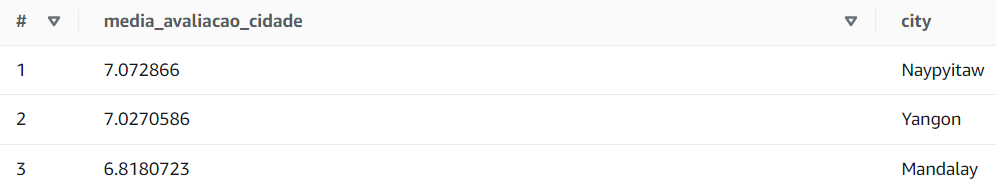

>Acima, tiramos a média de avaliação de experiência do cliente agrupados de acordo com a cidade. Notamos que a avaliação não varia muito de valor por cidade, sendo Mandalay com a pior avaliação com 6,8 e as demais cidades com 7, que provavelmente é considerado um valor mediano, em uma escala de 0 a 10. No entanto, a empresa deveria realizar alguma ação para melhorar a experiência do cliente e, por consequência, subir a avaliação.



15.   **Nesse banco de dados, qual a média de avaliação entre homens e mulheres.**



**Query22**:SELECT AVG(rating) AS "media_avaliacao_sexo", gender FROM supermarkets GROUP BY gender;

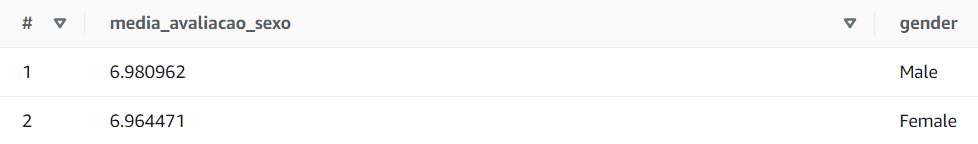

>Agora, nós filtramos a média de avaliação de acordo com o sexo. Vemos que não há uma diferença significativa entre homens e mulheres.



16.   **Nesse banco de dados, quero saber quais os valores da soma do custo de mercadoria vendido por cada supermercado.**



**Query23**:SELECT SUM(cogs) AS "Soma_cogs", branch FROM supermarkets GROUP BY branch ORDER BY Soma_cogs DESC

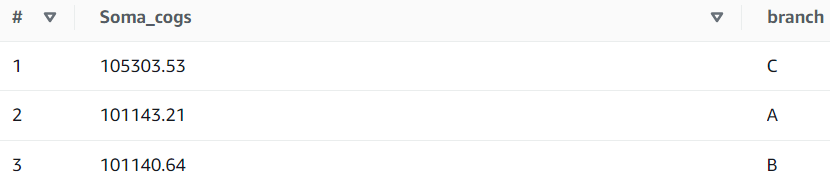

>Na visualização acima, vemos que somamos os valores de custo de mercadoria em relação às filiais. Vemos que não há uma diferença significativa nos valores, sendo a filial "C" com o maior valor da soma.



17.   **Nesse banco de dados, quero saber a data onde o valor de custo da mercadoria  foi maior e menor?**




**Query24**:SELECT invoice_id, branch, city, datas,cogs FROM supermarkets WHERE cogs = (SELECT MAX(cogs) FROM supermarkets)
OR cogs = (SELECT MIN(cogs) FROM supermarkets);

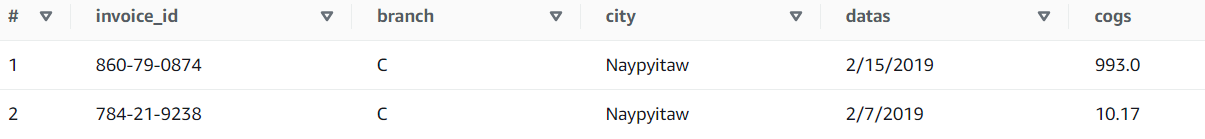

>Na visualização acima, localizamos qual foi o valor máximo e mínimo de custo de mercadoria e sua respectiva data, id do cliente, filial e cidade. Esse tipo de análise é importante para casos em que é necessário achar algum tipo de dados específico com relação a alguns parâmetros.



18.   **Nesse banco de dados, Quero saber qual a renda bruta mínima, média e máxima de acordo com a cidade.**



**Query25**: SELECT AVG(gross_income) AS "renda_media", MIN(gross_income) AS "renda_minima", MAX(gross_income) AS "renda_maxima", city FROM supermarkets GROUP BY city ORDER BY renda_media DESC;

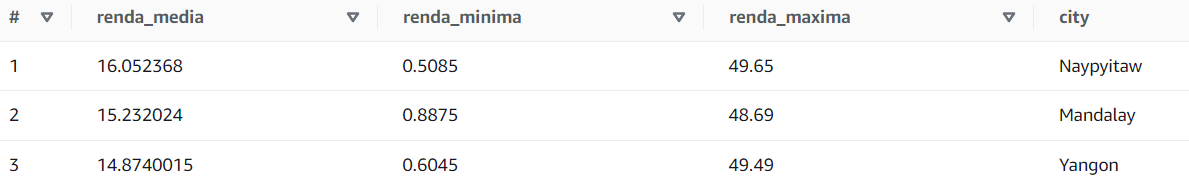

>Na visualização acima, calculamos a renda bruta média, mínima e máxima de acordo com a cidade. Analisando os dados vemos que a cidade de Naypyitaw possui a maior renda_média, seguida da Mandalay e da Yangon.



19.   **Nesse banco de dados, quero saber qual a média da renda bruta de acordo com o sexo.**



**Query26**:SELECT AVG(gross_income) AS "renda_media_sexo", gender FROM supermarkets GROUP BY gender;

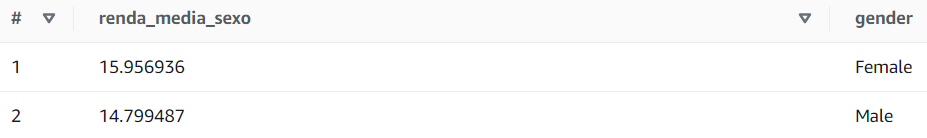

>Na visualização acima, calculamos a média da renda bruta de acordo com o sexo e notamos que as mulheres possuem uma renda maior que os homens.



20.   **Nesse banco de dados, Qual a porcentagem de renda bruta mínima, média e máxima por tipo de cartão ?**


**Query27**:SELECT AVG(gross_margin_percentage) AS "porc_media_renda_bruta", MIN(gross_margin_percentage) AS "porc_minimo_renda_bruta", MAX(gross_margin_percentage) AS "porc_max_renda_bruta",payment FROM supermarkets GROUP BY payment;

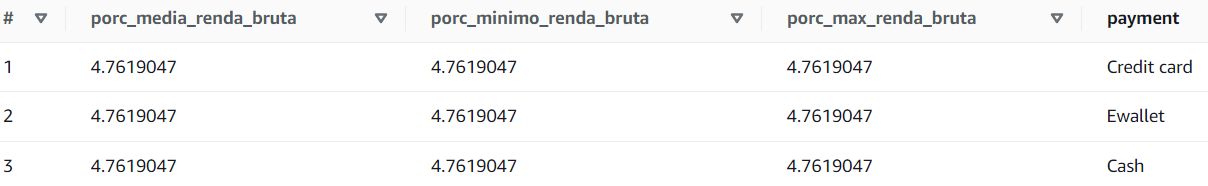

>Na imagem acima, vemos que calculamos os valores médios, mínimos e máximos da porcentagem de renda bruta agrupados por tipo de pagamento utilizado. Observamos que o nosso banco de dados traz valores iguais em todos os campos, o que torna os valores da porcentagem de renda bruta inválidos para a análise, isso provavelmente se deve a algum erro no próprio banco de dados.



21.   **Nesse banco de dados, qual a quantidade de pessoas de acordo com o sexo utilizam determinado tipo de pagamento?**



**Query28**:SELECT gender, payment, COUNT(*) AS quantity FROM supermarkets GROUP BY gender, payment ORDER BY quantity DESC;

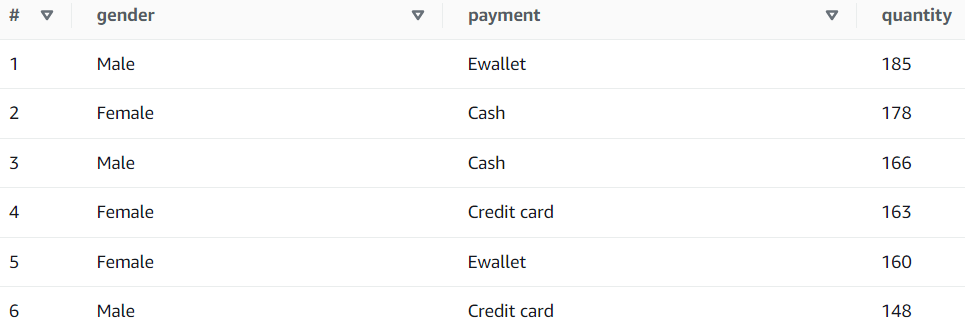

>Na visualização acima, vemos que contamos os valores de quantidade por tipo de pagamento e sexo do cliente. Analisando os dados, vemos que houve uma maior quantidade de compras em Ewallet, cartão de crédito e dinheiro realizadas por mulheres do que por homens. Análises semelhantes a essas são interessantes para identificar o perfil dos clientes.



22.   **Nesse banco de dados, selecione os valores de Unit_price, invoice_id, datas e Times onde product_line são Food and beverages**



**QUERY29**:SELECT invoice_id, product_line, unit_price, datas , times FROM supermarkets WHERE product_line LIKE 'Foo%' ORDER BY unit_price DESC;

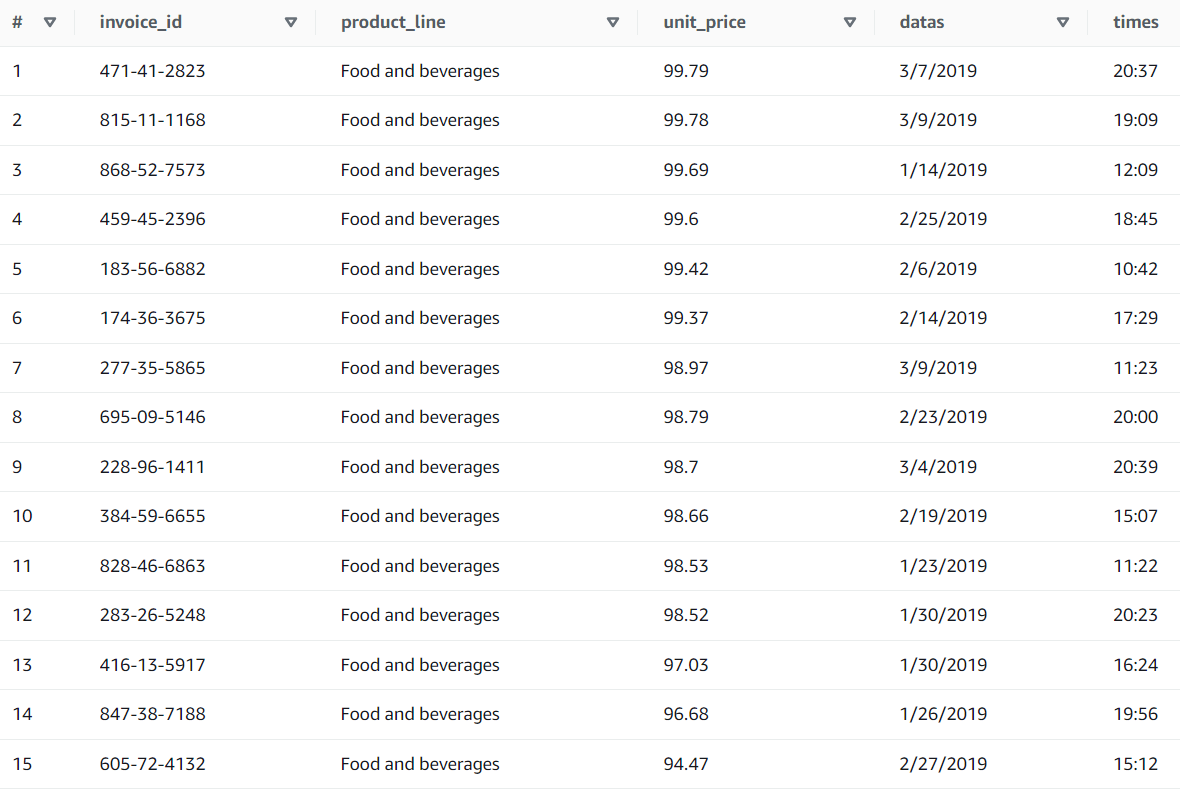

>Na base de dados acima, filtramos a linha de produtos de comida e bebidas, o número de identificação da compra, o preço único, a data e a hora da compra. Podemos ver na visualização os maiores preços únicos que essa linha de produtos teve.

23.**Nesse banco de dados, selecione os valores de preço Unitário, id, data e hora onde a linha de produto é Sports and travel.**

**QUERY30**:SELECT invoice_id, product_line, unit_price, datas , times FROM supermarkets WHERE product_line LIKE 'Spo%' ORDER BY unit_price DESC

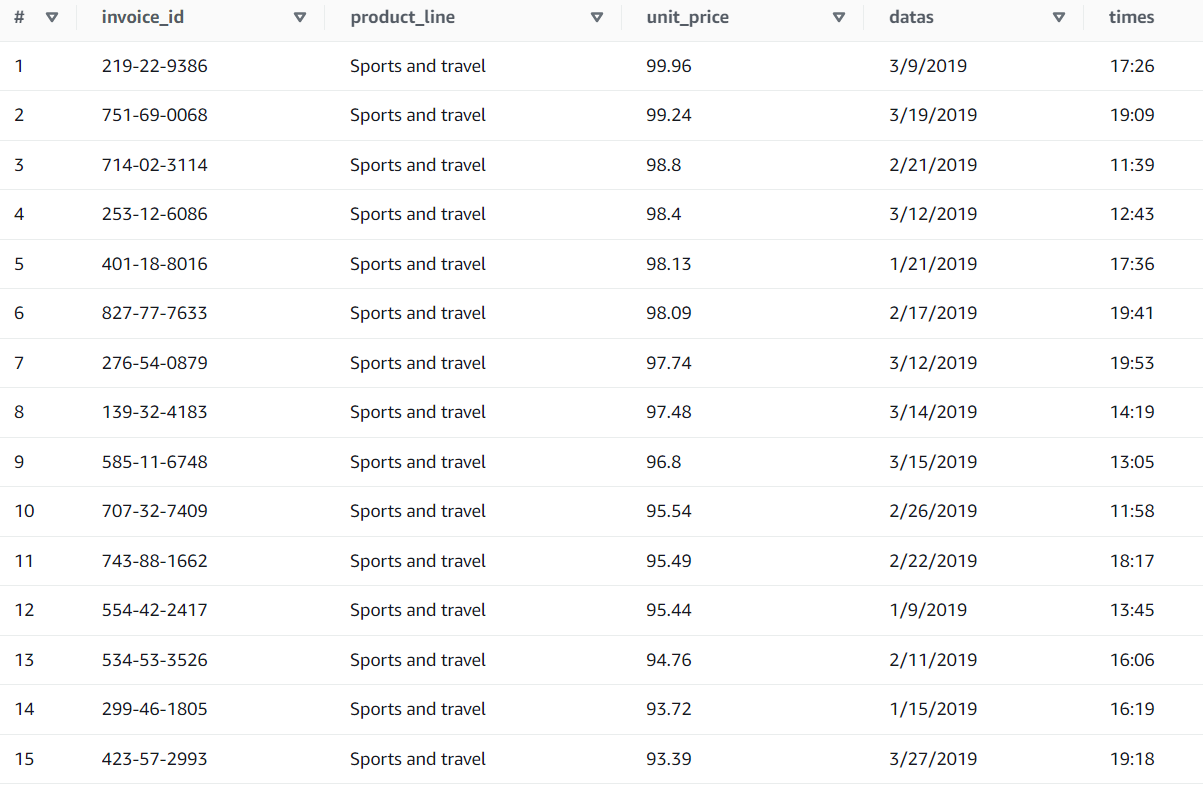

>Agora , temos uma visualização semelhante à anterior, mas com a linha de produtos de viagens e esportes. Vemos acima os valores de preço único ordenados de forma decrescente e suas respectivas data e hora.

24. **Nesse banco de dados, tire os valores médio, mínimo e máximo do preço unitário de acordo com a linha do produto**

**QUERY31**: SELECT MIN(unit_price) AS "preco_unico_min", MAX(unit_price) AS "preco_unico_max", AVG(unit_price) AS "preco_unico_med", product_line FROM supermarkets GROUP BY product_line ORDER BY "preco_unico_med" DESC;


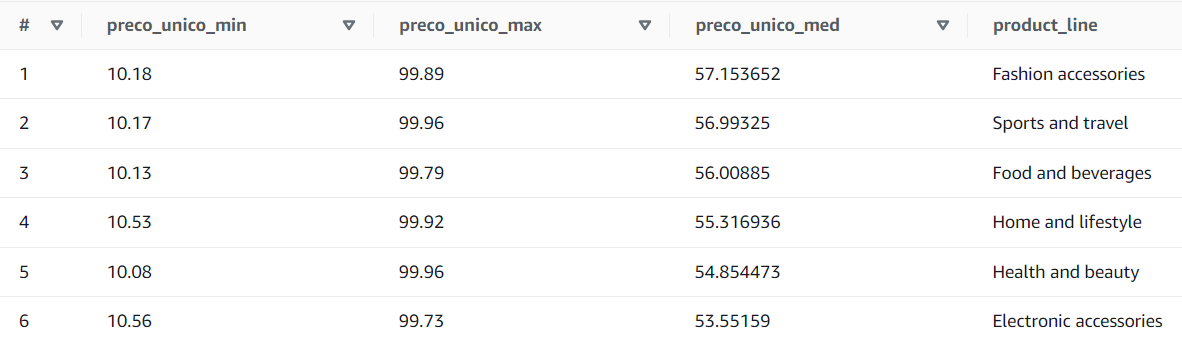

>Acima, mostramos os valores de mínimo, máximo e médio da coluna preço único agrupados por linha de produto. Os valores do preço médio foram ordenados de forma decrescente para mostrar as maiores médias de valores.

25. **Nesse banco de dados, defina os valores de preço unitário em preço baixo e preco alto , mostrando o id_cliente e a linha do produto.**

**QUERY32**:SELECT invoice_id, product_line , unit_price,
CASE
    WHEN unit_price > 50 THEN 'preço unitário alto'
    WHEN unit_price < 50 THEN 'preço unitário baixo'
END
AS classeUnitPrice
FROM supermarkets
WHERE unit_price > 10;

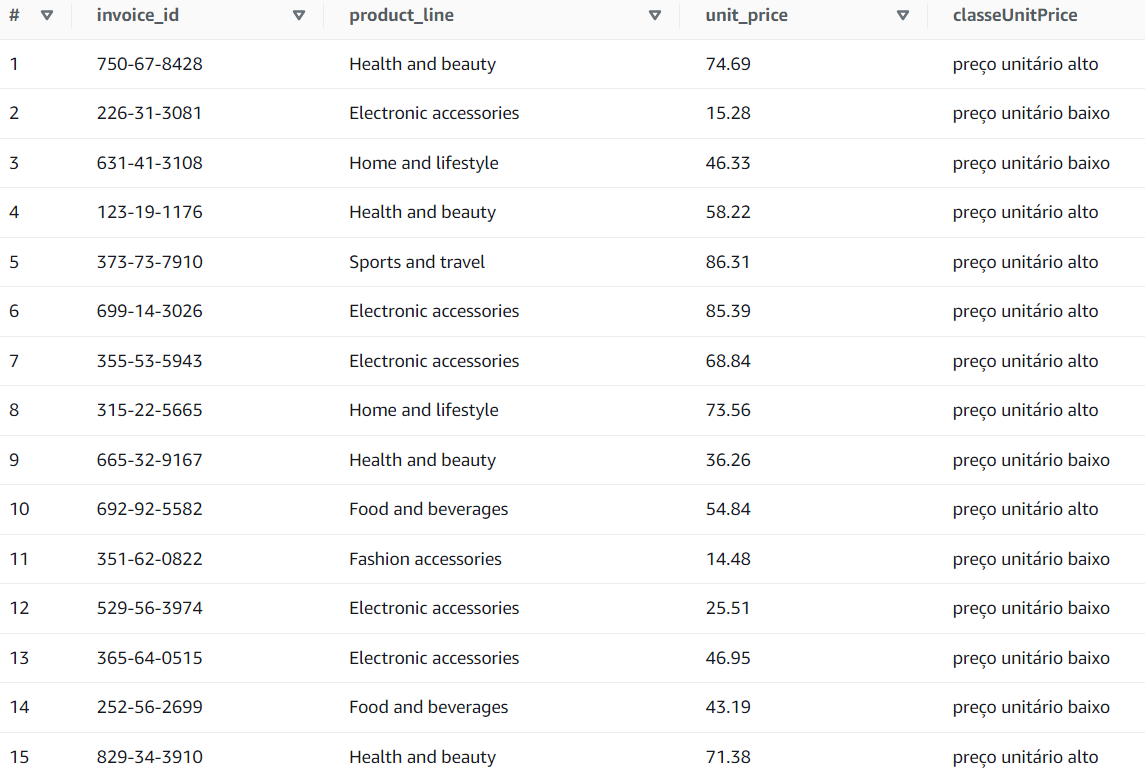

 > Acima, selecionamos os valores de id, linha de produtos e preço único. Classificamos os valores de preço único em baixo ou alto para melhor entender os dados que estamos trabalhando.

## Conclusão

Com esse projeto pudemos explorar e analisar o banco de dados no ambiente da Microsoft, com o intuito de otimizar o trabalho de analisar os dados com ferramentas disponíveis no AWS ANTHENA e com o ambiente de armazenamneto no S3 BUCKET , que juntos trazem um ótimo ambiente para trabalhararmos em responder questionamentos de negócios como os que vimos aqui nesse projeto, dentre várias outras dúvidas que poderiam surgir e poderiam ser analisadas.